In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt


df=pd.read_csv("./data_formatted/training_dataset.csv",low_memory=False)
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

df = df.dropna()
df = df[(df.player1_plays > 6) & (df.player2_plays>6)]
df.shape

(38946, 30)

In [2]:
from sklearn.model_selection import train_test_split

X = df[["player1_name", "player1_age", "player1_atprank", "player1_plays", "player1_wins", "player1_losses", "player1_height", "player1_weight", "player1_oddsB365",
        "player2_name", "player2_age", "player2_atprank", "player2_plays", "player2_wins", "player2_losses", "player2_height", "player2_weight", "player2_oddsB365",
        "match_date"]]
y = df.winner_player1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)# shuffle=False)

In [3]:
from sklearn import preprocessing

col_to_drop = ["player1_name", "player2_name", "match_date"]
X_train_filtered = X_train.drop(col_to_drop,axis=1)
X_test_filtered = X_test.drop(col_to_drop,axis=1)

X_train_filtered.head()

,player1_age,player1_atprank,player1_plays,player1_wins,player1_losses,player1_height,player1_weight,player1_oddsB365,player2_age,player2_atprank,player2_plays,player2_wins,player2_losses,player2_height,player2_weight,player2_oddsB365
11623,31.603012,71.0,177,99,78,183.0,77.0,4.33,27.895962,30.0,189,125,64,188.0,84.0,1.19
35205,29.730322,84.0,316,139,177,191.0,80.0,2.62,19.137577,44.0,63,32,31,188.0,85.0,1.44
42217,37.177276,2.0,1078,929,149,185.0,85.0,1.40,28.785763,12.0,445,306,139,178.0,73.0,3.00
51489,23.813826,85.0,120,50,70,196.0,78.0,2.20,29.730322,62.0,113,54,59,185.0,85.0,1.67
42795,31.091034,93.0,224,107,117,188.0,76.0,1.66,23.778234,103.0,16,7,9,191.0,76.0,2.10


In [25]:
X_train_filtered.shape

(31156, 16)

In [33]:
import tensorflow as tf
import keras
from keras.layers import Dense

# Sequential
model = keras.Sequential()
# Hidden layer 1
model.add(Dense(16, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/20
312/312 [==============================] - 1s 952us/step - loss: 6.4539 - accuracy: 0.5661 - val_loss: 1.3680 - val_accuracy: 0.5902
Epoch 2/20
312/312 [==============================] - 0s 730us/step - loss: 1.0692 - accuracy: 0.6052 - val_loss: 0.8503 - val_accuracy: 0.6137
Epoch 3/20
312/312 [==============================] - 0s 714us/step - loss: 0.7719 - accuracy: 0.6259 - val_loss: 0.7161 - val_accuracy: 0.6345
Epoch 4/20
312/312 [==============================] - 0s 711us/step - loss: 0.6886 - accuracy: 0.6343 - val_loss: 0.6806 - val_accuracy: 0.6399
Epoch 5/20
312/312 [==============================] - 0s 708us/step - loss: 0.6614 - accuracy: 0.6419 - val_loss: 0.6465 - val_accuracy: 0.6434
Epoch 6/20
312/312 [==============================] - 0s 731us/step - loss: 0.6454 - accuracy: 0.6454 - val_loss: 0.6387 - val_accuracy: 0.6540
Epoch 7/20
312/312 [==============================] - 0s 728us/step - loss: 0.6307 - accuracy: 0.6561 - val_loss: 0.6431 - val_accuracy:

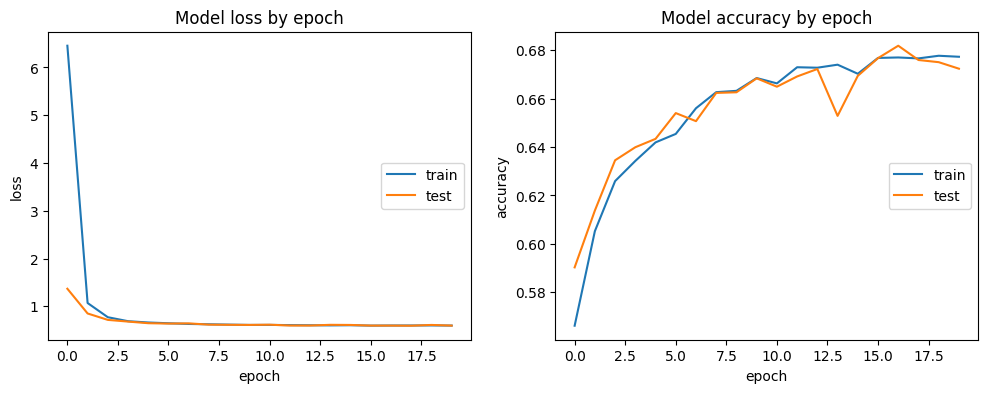

In [34]:
history = model.fit(X_train_filtered, y_train,                        # Training dataset
                        epochs = 20,                         # Number of epochs
                        batch_size = 100,                     # Len of batch
                        validation_data=(X_test_filtered, y_test))    # Validation dataset

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test_filtered)
print(y_predict)
#print(y_test)
#print('Accuracy :', accuracy_score(y_predict, y_test))

244/244 [==============================] - 0s 443us/step
[[0.17316073]
 [0.69597924]
 [0.4159177 ]
 ...
 [0.40358415]
 [0.2964575 ]
 [0.3238533 ]]
